In [3]:
!pip install yfinance

In [4]:
import yfinance as yf

In [5]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [6]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132
2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967
2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037
2004-09-01,2.557912,2.564637,2.482445,2.496891,2.494053,183633734
2004-09-02,2.470490,2.549693,2.464263,2.528273,2.525399,303810504


### So this represents the first five rows of Google stick price from 20 yeards back.
### The Close and Adj Close are almost equal , they are shown bcus they represent stock.

In [8]:
google_data.shape

(5033, 6)

In [9]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,45.756797,46.241027,45.301185,45.780454,45.730565,1.150544e+08
std,43.883878,44.372921,43.458044,43.923035,43.879514,1.491654e+08
min,2.470490,2.534002,2.464263,2.490913,2.488082,1.584340e+05
25%,13.074743,13.176860,12.922812,13.077233,13.062369,2.722600e+07
50%,27.082146,27.348913,26.876499,27.072172,27.041401,5.453600e+07
75%,60.617001,61.278500,60.187500,60.770500,60.701424,1.415687e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [10]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-08-27 to 2024-08-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [11]:
 google_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 1.0, 'CLosing price of Google stock:')

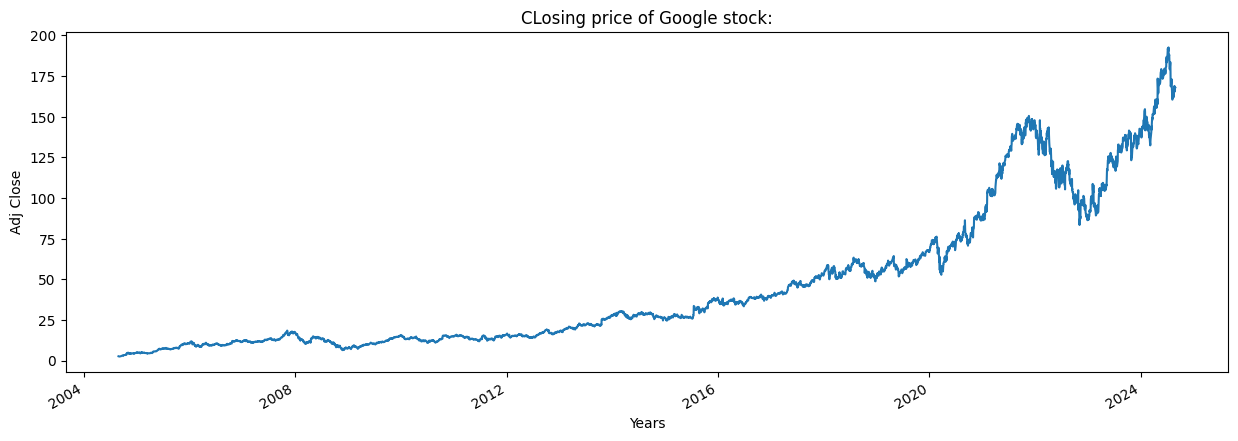

In [13]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("CLosing price of Google stock:")

In [14]:
def plot_graph(figsize ,values,column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name } of Google stock:")

In [15]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

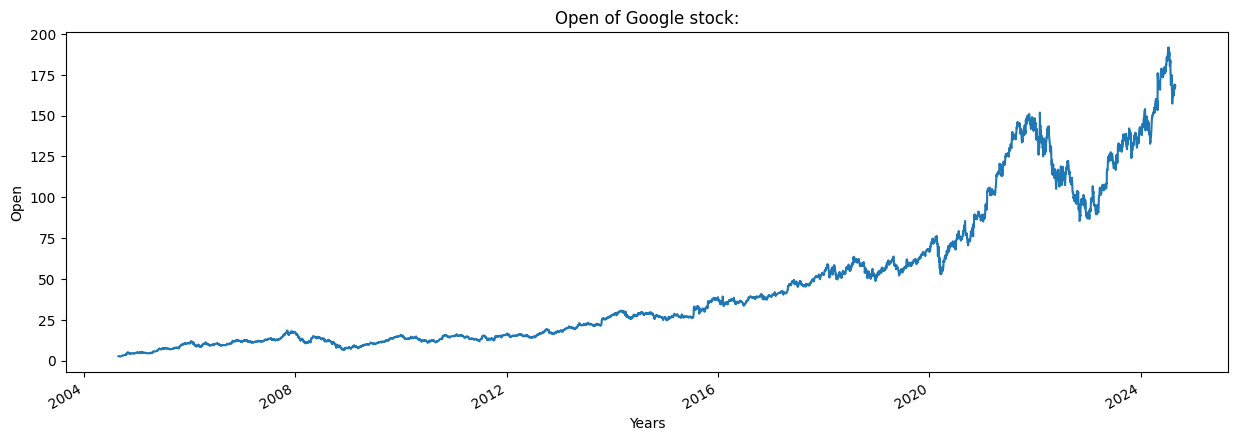

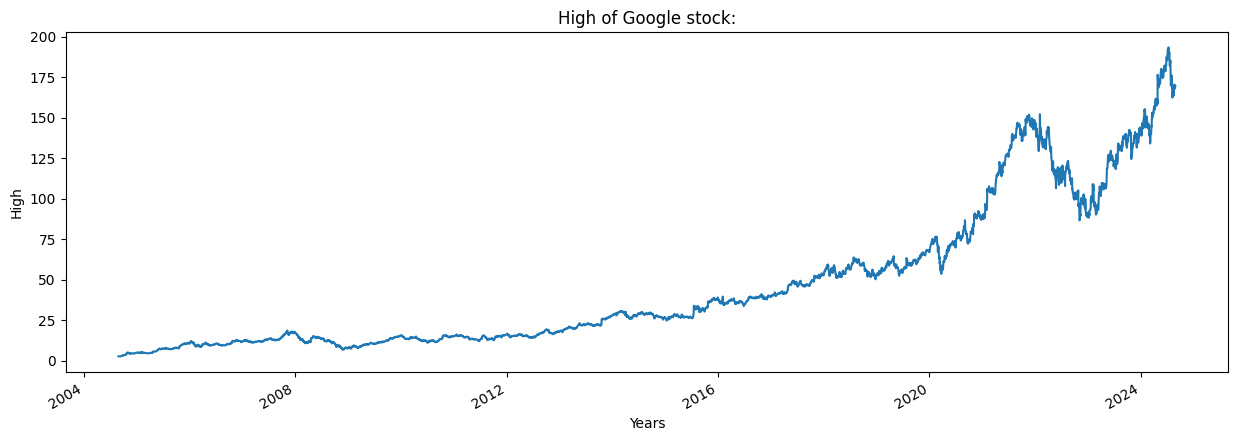

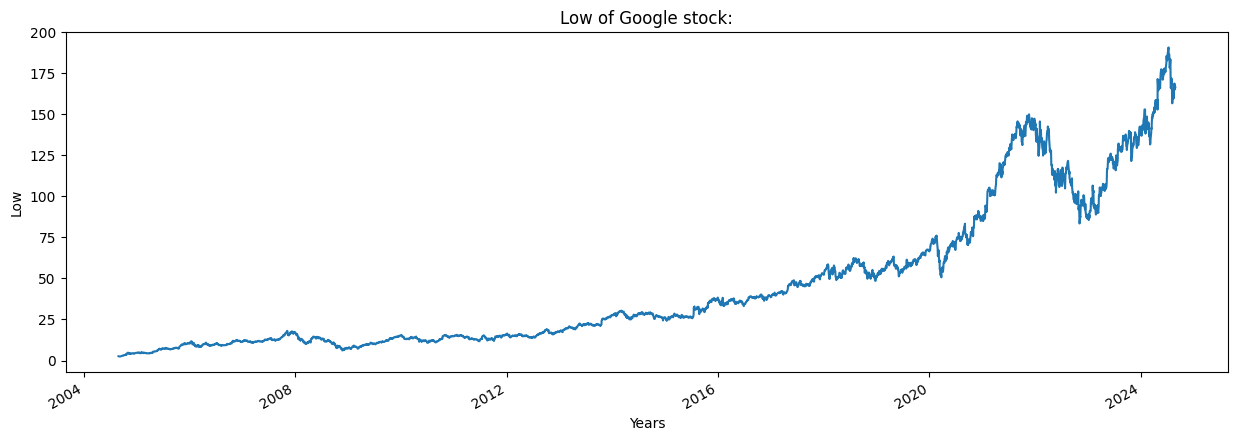

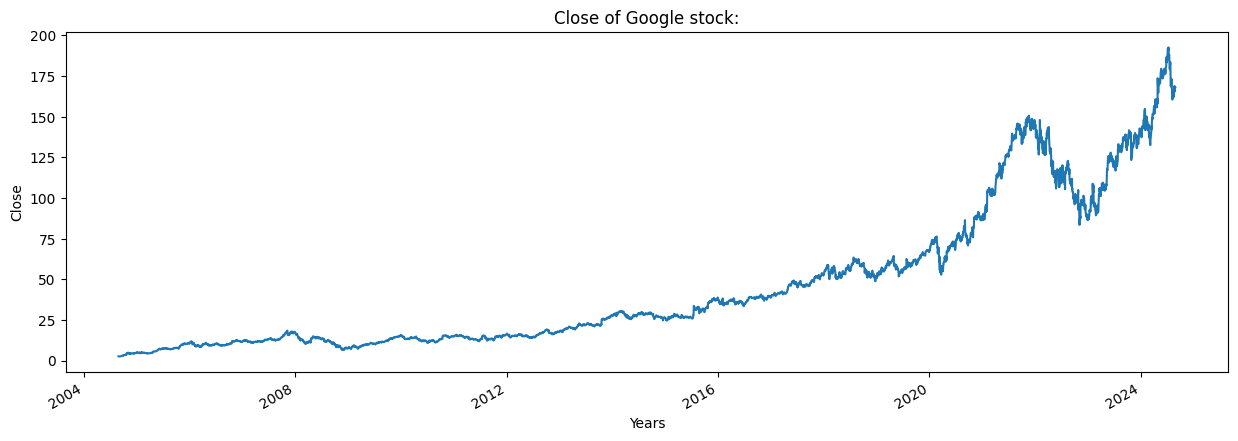

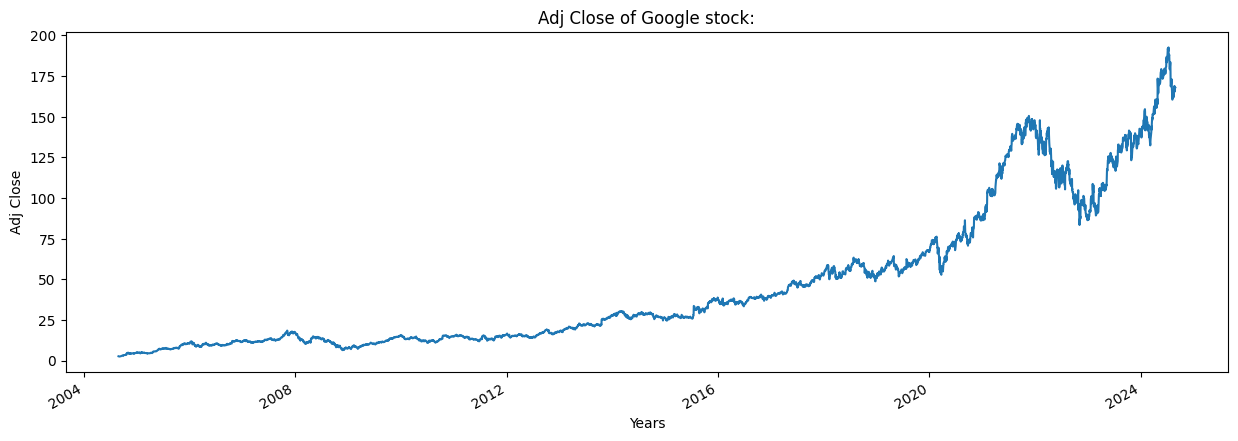

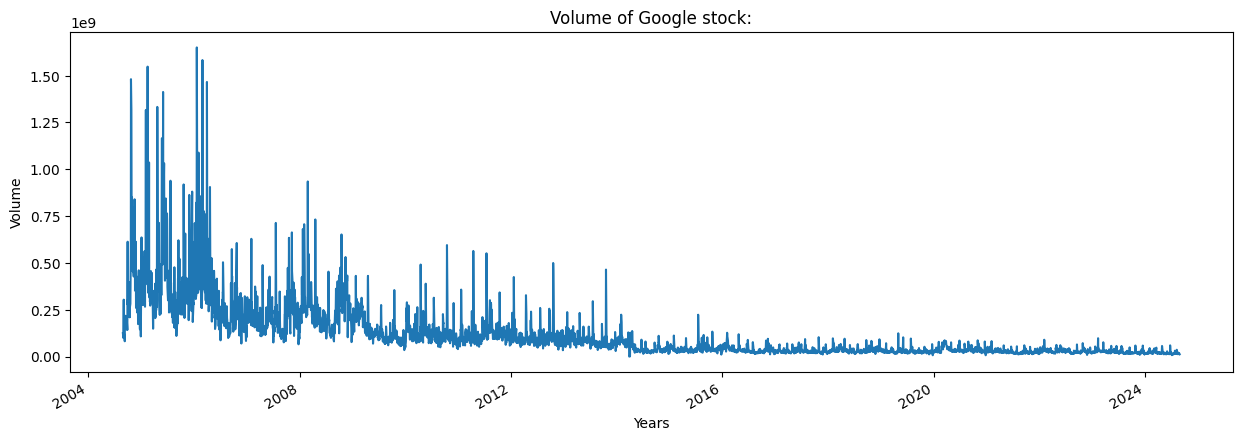

In [16]:
 for column in google_data.columns:
  plot_graph((15,5),google_data[column],column)

10, 20, 30, 40, 50, 60, 70, 80, 90, 100

MA (Moving Average) for 5 days ==> null null null null

In [17]:
temp_data = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data[0].rolling(5).mean() # Select the first (and only) column before calculating the rolling mean
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


This is for understanding moving average

In [20]:
for i in range(2004,2025):
  print(i,list(google_data.index.year).count(i))

2004 88
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 164


In [21]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [22]:
google_data['MA_for_250_days']

,MA_for_250_days
Date,
2004-08-27,NaN
2004-08-30,NaN
2004-08-31,NaN
2004-09-01,NaN
2004-09-02,NaN
...,...
2024-08-20,151.974388
2024-08-21,152.112674
2024-08-22,152.253547


In [23]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-08-17,NaN
2005-08-18,NaN
2005-08-19,NaN
2005-08-22,NaN
2005-08-23,5.132557


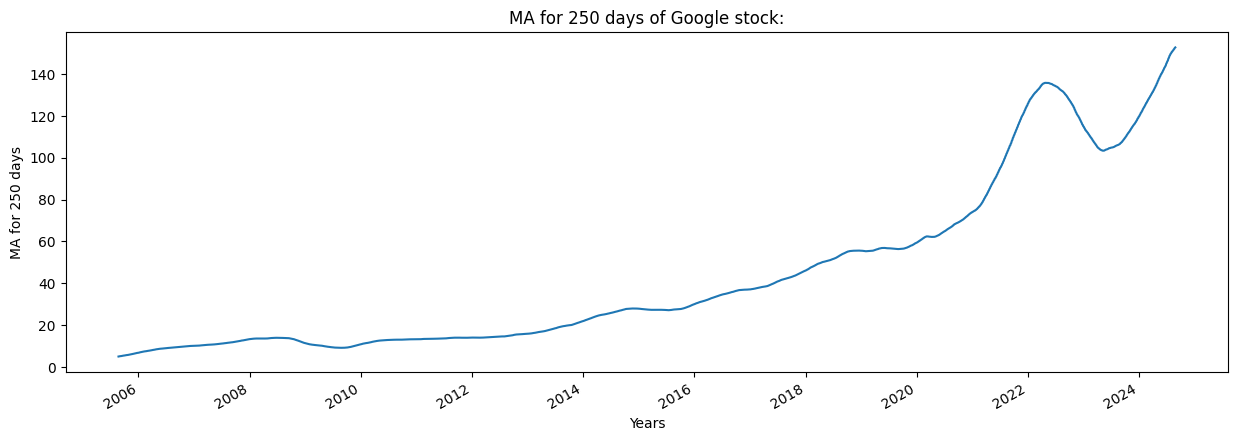

In [24]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA for 250 days')


<Figure size 640x480 with 0 Axes>

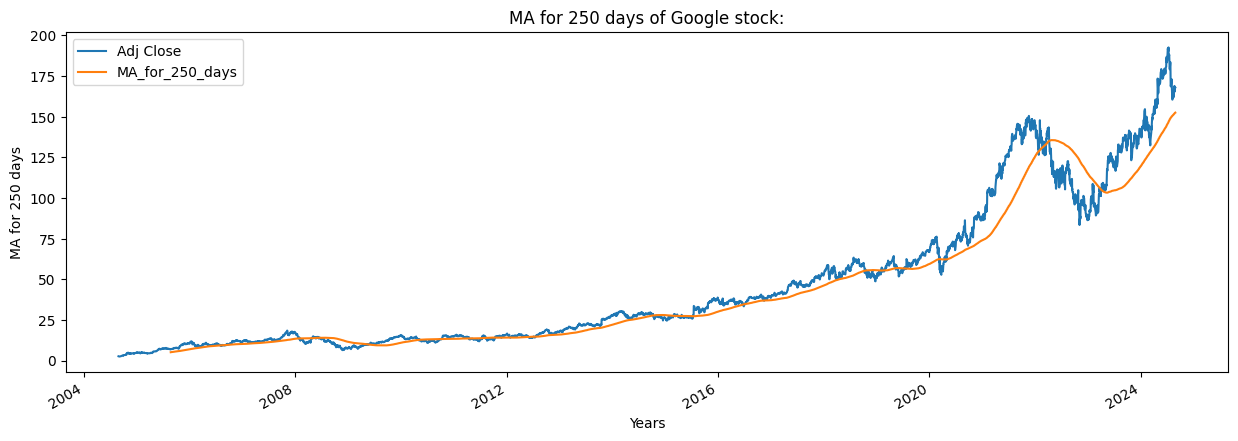

In [25]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA for 250 days')


In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-27,2.640835,NaN
2004-08-30,2.537839,-0.039001
2004-08-31,2.546795,0.003529
2004-09-01,2.494053,-0.020709
2004-09-02,2.525399,0.012568


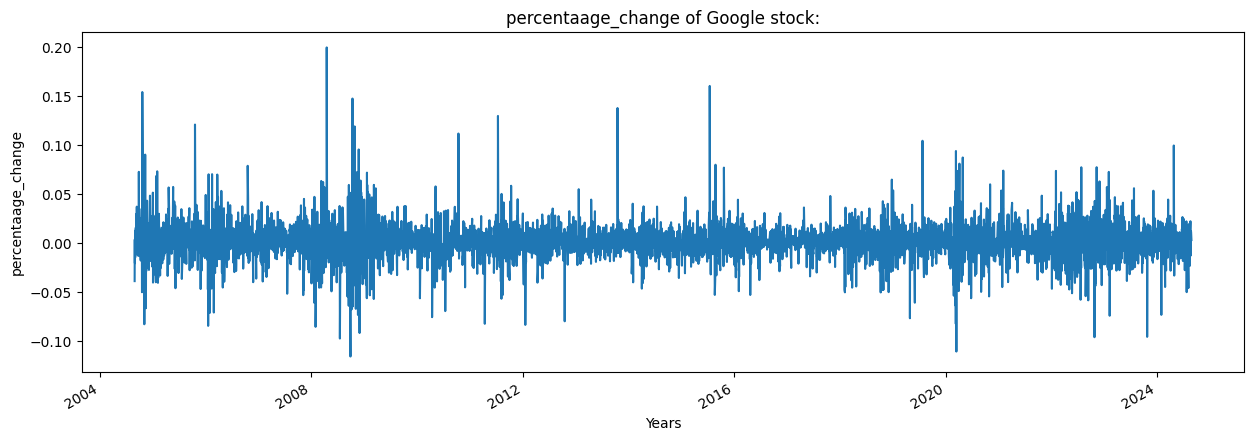

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentaage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[8.03236951e-04],
       [2.61643473e-04],
       [3.08737468e-04],
       ...,
       [8.57129287e-01],
       [8.67330515e-01],
       [8.69959715e-01]])

In [31]:
len(scaled_data)

5033

In [32]:
x_data = []
y_data = []
for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)


In [33]:
x_data[0],y_data[0]

(array([[8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.34924043e-03],
        [5.49314139e-03],
        [5.76917233e-03],
        [6.42981593e-03],
        [6.27021613e-03],
        [5.29560337e-03],
        [6.4

In [34]:

int(len(x_data)*0.7)

3453

In [35]:
4908-100-int(len(x_data)*0.7)

1355

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test  = x_data[splitting_len:]
y_test  = y_data[splitting_len:]


In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train,y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 338s 96ms/step - loss: 1.7347e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 376s 95ms/step - loss: 7.4912e-05


In [42]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step


In [44]:
predictions

array([[0.28749323],
       [0.28426033],
       [0.28192636],
       ...,
       [0.815306  ],
       [0.80793107],
       [0.806641  ]], dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.161224],
       [ 56.546417],
       [ 56.102562],
       ...,
       [157.53639 ],
       [156.13388 ],
       [155.88855 ]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 57.3832016 ],
       [ 56.87627792],
       [ 53.99955368],
       ...,
       [165.49000549],
       [167.42999268],
       [167.92999268]])

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))


In [48]:
rmse

5.8852077036269375

In [49]:
ploting_data = pd.DataFrame(
{
    'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)

},
                             index = google_data.index[splitting_len+100:]
                            )
ploting_data.head()

,original_test_data,predictions
Date,,
2018-10-08,57.383202,57.161224
2018-10-09,56.876278,56.546417
2018-10-10,53.999554,56.102562
2018-10-11,53.904659,54.712429
2018-10-12,55.440914,53.695339


<Figure size 640x480 with 0 Axes>

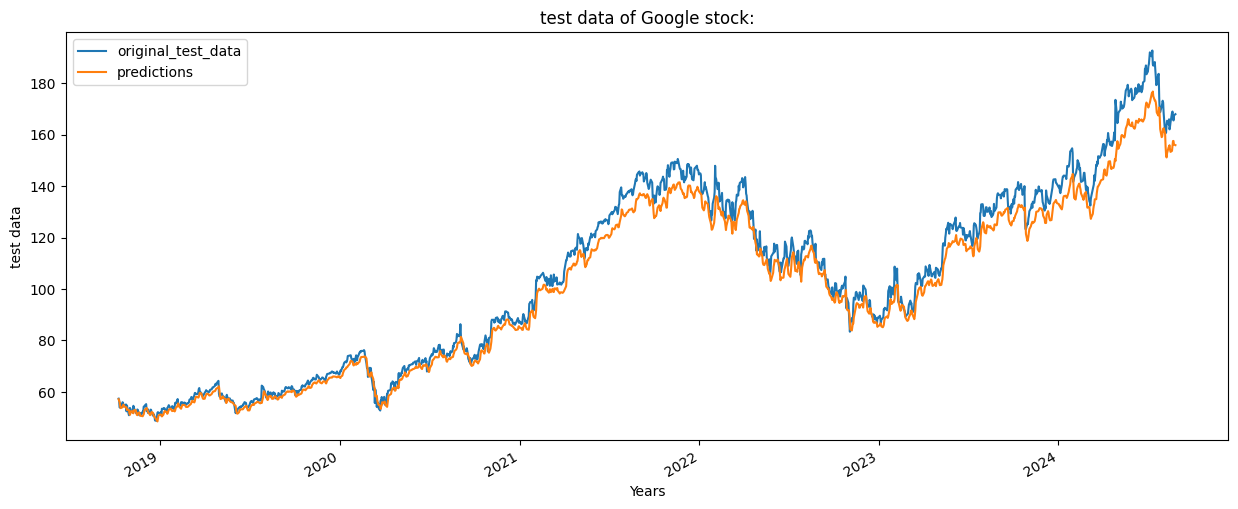

In [50]:
plot_graph((15,6),ploting_data, 'test data')

In [51]:
plot_graph((15,6),pd.concat([Adj_close_price[:splitting_len+100]),ploting_data], axis=0), 'whole data')

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-51-1b4523a0f11e>, line 1)

In [52]:
model.save("Latest_stock_price_model.keras")